In [4]:
import pandas as pd

df = pd.read_csv('./data/kospi.csv')
df["date"] = pd.to_datetime(df["date"])
df

date    close     open     high      low       volume  change
0     1981-05-01   123.60   123.60   123.60   123.60    3330000.0    0.98
1     1981-05-02   123.50   123.50   123.50   123.50    2040000.0   -0.08
2     1981-05-04   120.60   120.60   120.60   120.60    1930000.0   -2.35
3     1981-05-06   120.70   120.70   120.70   120.70    1690000.0    0.08
4     1981-05-07   119.30   119.30   119.30   119.30    1480000.0   -1.16
...          ...      ...      ...      ...      ...          ...     ...
11177 2023-04-14  2571.49  2580.10  2581.74  2560.53  892450000.0    0.38
11178 2023-04-17  2575.91  2570.30  2577.08  2561.14  775750000.0    0.17
11179 2023-04-18  2571.09  2582.23  2582.23  2557.19  896930000.0   -0.19
11180 2023-04-19  2575.08  2570.06  2582.11  2568.46     956990.0    0.16
11181 2023-04-20  2563.00  2566.06  2573.94  2560.49     758870.0   -0.47

[11182 rows x 7 columns]

# Plot original graph

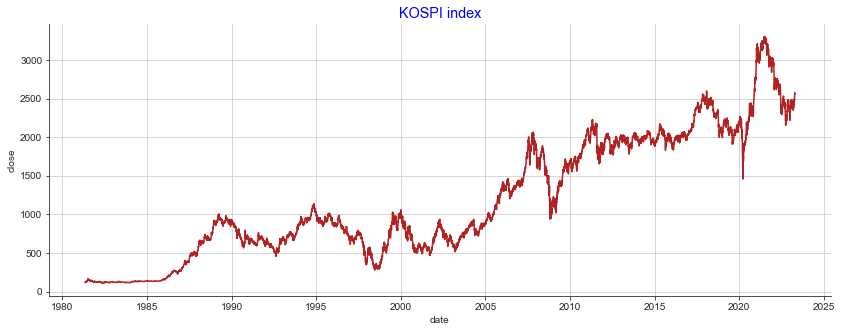

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df,x="date",y='close',color='firebrick')
sns.despine()
plt.title("KOSPI index",size='x-large',color='blue')
plt.grid()

In [6]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(name="close",
                         x=df["date"],
                         y=df["close"],
                         mode="lines"))
fig.update_layout(title_text="KOSPI index",
                  title_x=0.5)
fig.update_xaxes(title='date')
fig.update_yaxes(title='close')
fig.show()

# Apply filter

In [60]:
from filters import Guidedfilter

ModuleNotFoundError: No module named 'filters'

In [55]:
Guidedfilter

<function __main__.Guidedfilter(seq)>

In [56]:
df[["guided_close"]] = df[["close"]].rolling(31, center=True, min_periods=1).apply(Guidedfilter)
df

date    close     open     high      low       volume  change  \
0     1981-05-01   123.60   123.60   123.60   123.60    3330000.0    0.98   
1     1981-05-02   123.50   123.50   123.50   123.50    2040000.0   -0.08   
2     1981-05-04   120.60   120.60   120.60   120.60    1930000.0   -2.35   
3     1981-05-06   120.70   120.70   120.70   120.70    1690000.0    0.08   
4     1981-05-07   119.30   119.30   119.30   119.30    1480000.0   -1.16   
...          ...      ...      ...      ...      ...          ...     ...   
11177 2023-04-14  2571.49  2580.10  2581.74  2560.53  892450000.0    0.38   
11178 2023-04-17  2575.91  2570.30  2577.08  2561.14  775750000.0    0.17   
11179 2023-04-18  2571.09  2582.23  2582.23  2557.19  896930000.0   -0.19   
11180 2023-04-19  2575.08  2570.06  2582.11  2568.46     956990.0    0.16   
11181 2023-04-20  2563.00  2566.06  2573.94  2560.49     758870.0   -0.47   

       guided_close  guided_change  
0        120.816870      -0.048077  
1        120.815880      -0.074045  
2        120.801277      -0.083563  
3        120.838005      -0.035452  
4        120.945859       0.026928  
...             ...            ...  
11177   2493.450995       0.280926  
11178   2494.856201       0.316198  
11179   2512.368183       0.346894  
11180   2513.814515       0.304359  
11181   2539.341952       0.300507  

[11182 rows x 9 columns]

In [57]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(name="close",
                         x=df["date"],
                         y=df["close"],
                         mode="lines"))
fig.add_trace(go.Scatter(name="guided_close",
                         x=df["date"],
                         y=df["guided_close"],
                         mode="lines"))
fig.update_layout(title_text="KOSPI index",
                  title_x=0.5)
fig.update_xaxes(title='date')
fig.update_yaxes(title='close')
fig.show()